# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [25]:
# откройте данные: ваш код здесь

import pandas as pd

data = pd.read_csv("data/spam_or_not_spam.zip")
display(data.sample(3))
print('Data shape: ', data.shape)

,email,label
1257,thanks matthias after installing those package...,0
1357,on wed aug NUMBER NUMBER at NUMBER NUMBER NUMB...,0
1582,i have a spamd spamc razor dcc setup my razor ...,0


Data shape:  (3000, 2)


In [26]:
# рассчитайте частоты для классов : ваш код здесь
# print((email_data.label.value_counts(normalize=True)*100).round(2))
print(data.label.value_counts())

label
0    2500
1     500
Name: count, dtype: int64


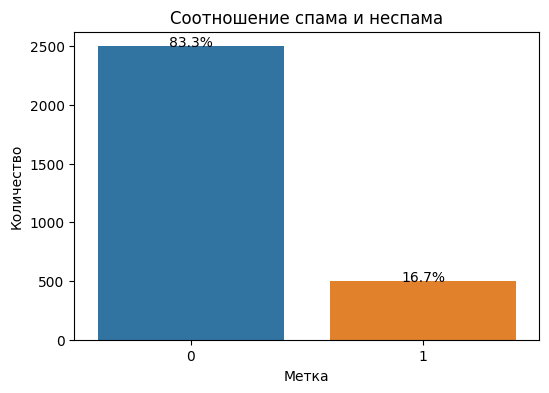

In [27]:
# визуализируйте результат: ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='label', data=data)

plt.title('Соотношение спама и неспама')
plt.xlabel('Метка')
plt.ylabel('Количество')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.1,
            f'{height/len(data):.1%}',
            ha='center')

plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [29]:
#ваш код здесь

import numpy as np

data['email'] = (
    data['email']
    .replace(r'^\s*$', np.nan, regex=True)  # Пустые строки и строки с пробелами на NaN
    # .str.replace(r'\W+', ' ', regex=True)   # Небуквенные символы на пробелы
    # .str.replace('\s+', ' ', regex=True)    # Последовательности пробелов на одиночные
    # .str.strip()                            # Удалить пробелы в начале и конце
    # .str.lower()                            # Привести к нижнему регистру
)

# Удаление строк с пропущенными значениями
data = data.dropna()

print('Размер таблицы после очистки:', data.shape)


Размер таблицы после очистки: (2997, 2)


Переводим данные в векторный вид:

In [30]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [31]:
#ваш код здесь

print("Количество признаков:", X.shape[1])

Количество признаков: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [32]:
#ваш код здесь

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data["email"])
y = data["label"]

print(X.shape, y.shape)

(2997, 34116) (2997,)


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [33]:
#ваш код здесь

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [37]:
#ваш код здесь

print("Среднее значение целевой переменной по тестовой выборке: ", y_test.mean().round(3))

Среднее значение целевой переменной по тестовой выборке:  0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [50]:
# ваш код здесь

from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [43]:
# ваш код здесь

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy on the test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision on the test set: {precision_score(y_test, y_test_pred)}")
print(f"Recall_score on the test set: {recall_score(y_test, y_test_pred):.3f}")
print(f"F1 on the test set: {f1_score(y_test, y_test_pred):.3f}")

Accuracy on the test set: 0.988
Precision on the test set: 1.0
Recall_score on the test set: 0.927
F1 on the test set: 0.962


Нарисуйте ROC-кривую:

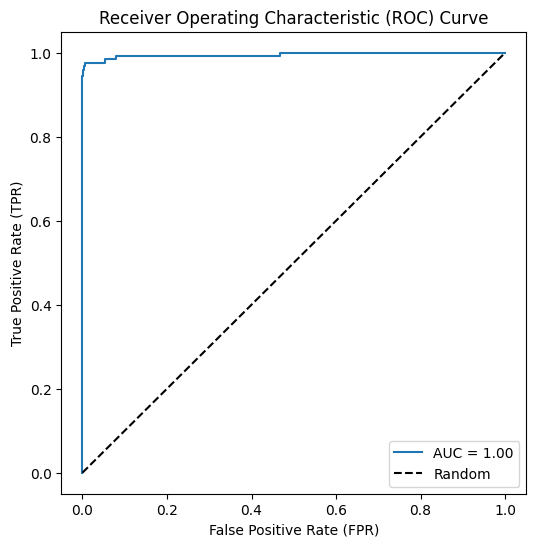

In [45]:
#ваш код здесь

from sklearn.metrics import roc_curve, roc_auc_score

# Значения ROC-кривой
y_test_pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])

# площадь под ROC-кривой
auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

Best alpha: 0.1
Best accuracy: 0.992


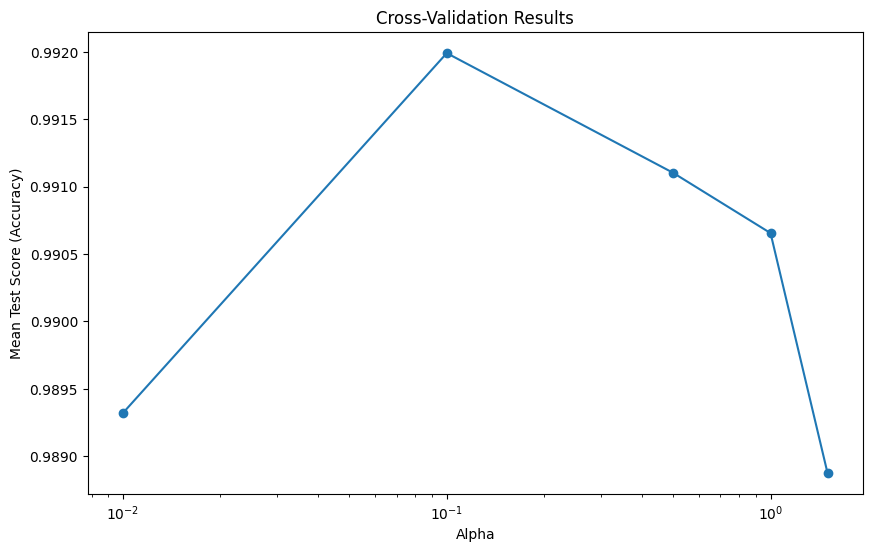

In [49]:
#ваш код здесь

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


alphas = [0.01, 0.1, 0.5, 1.0, 1.5]

nb_classifier = ComplementNB()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(nb_classifier, {'alpha': alphas}, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best accuracy: {grid_search.best_score_:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(alphas, grid_search.cv_results_['mean_test_score'], marker='o')
plt.title('Cross-Validation Results')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (Accuracy)')
plt.xscale('log')  # Если alpha в диапазоне от 0.01 до 2, логарифмическая шкала полезна
plt.show()
